# Data Importing

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
df=pd.read_csv('kc_house_data.csv');
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data  Dictionary

- **id** - Unique ID for each home sold
- **date** - Date of the home sale
- **price** - Price of each home sold
- **bedrooms** - Number of bedrooms
- **bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- **sqft_living** - Square footage of the apartments interior living space
- **sqft_lot** - Square footage of the land space
- **floors** - Number of floors
- **waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not
- **view** - An index from 0 to 4 of how good the view of the property was
- **condition** - An index from 1 to 5 on the condition of the apartment,
- **grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- **sqft_above** - The square footage of the interior housing space that is above ground level
- **sqft_basement** - The square footage of the interior housing space that is below ground level
- **yr_built** - The year the house was initially built
- **yr_renovated** - The year of the house’s last renovation
- **zipcode** - What zipcode area the house is in
- **lat** - Lattitude
- **long** - Longitude
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

 # Exploratory Data Analysis

## Information of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Check for null values

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Histogram for all features

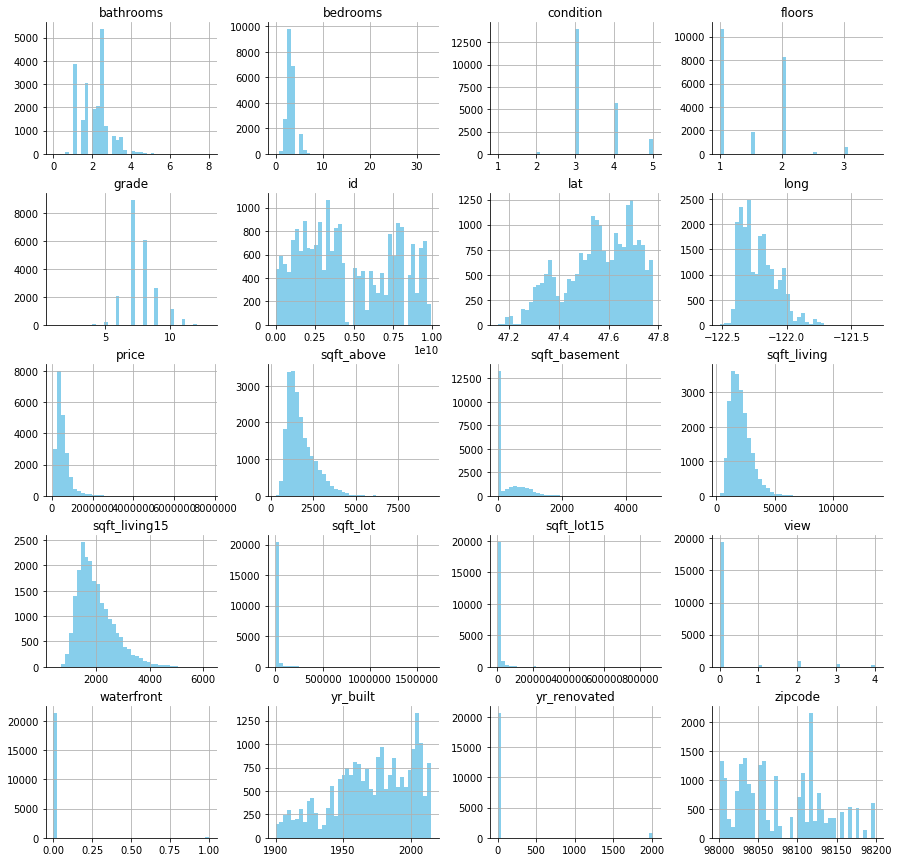

In [5]:
d = df.hist(bins=40, figsize=(15,15), xlabelsize='10', ylabelsize='10', color='skyblue');
sns.despine(right=True);
[x.title.set_size(12) for x in d.ravel()];
[x.yaxis.tick_left() for x in d.ravel()];

## Countplots for selected features (bedrooms, grade, floors, waterfront, view, condition, bathrooms)

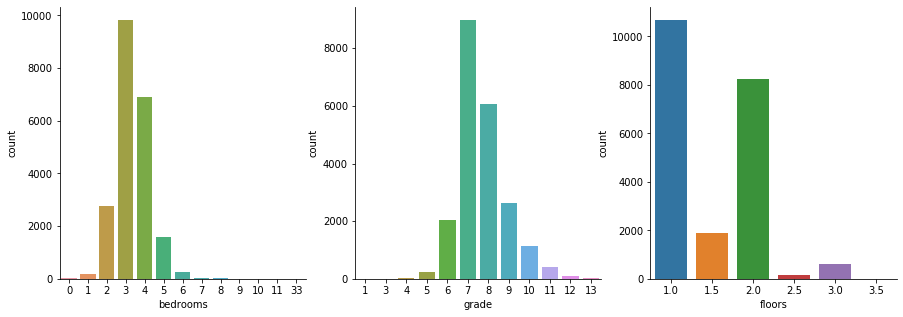

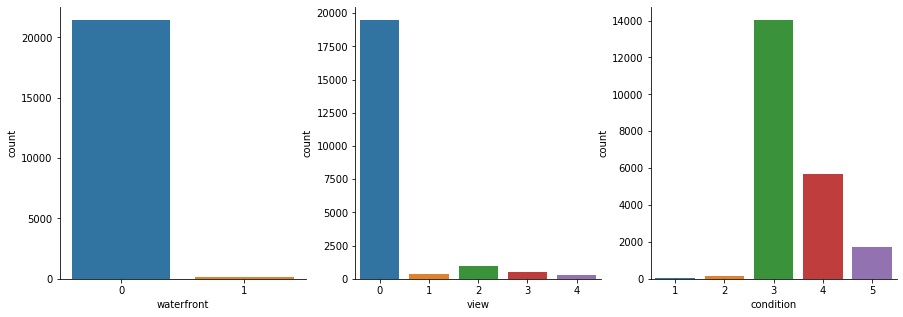

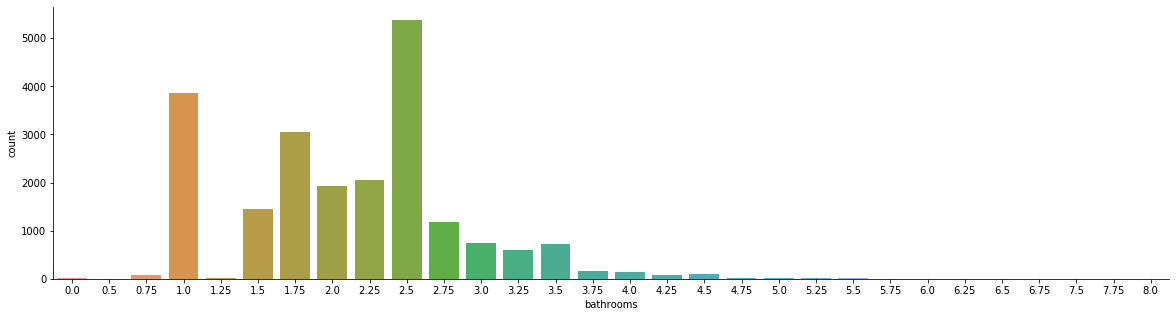

In [6]:
f, axes = plt.subplots(1,3, figsize=(15,5));
sns.countplot(df['bedrooms'], ax= axes[0]);
sns.countplot(df['grade'], ax= axes[1]);
sns.countplot(df['floors'], ax= axes[2]);
sns.despine(right = True);

f, axes = plt.subplots(1,3, figsize=(15,5));
sns.countplot(df['waterfront'], ax= axes[0]);
sns.countplot(df['view'], ax= axes[1]);
sns.countplot(df['condition'], ax= axes[2]);
sns.despine(right = True);

f, axes = plt.subplots(1,1, figsize=(20,5));
sns.countplot(df['bathrooms']);
sns.despine(right = True);

- First graph(bedroom):

    - Most of the houses (nearly 10000 units) have **3 bedrooms**, around 7000 houses have 4 bedrooms, followed by 2 bedrooms with around 3000 houses. A small number of houses with more than 5 bedrooms, including bedrooms with number of 6-11 and extreme of 33.


- Second graph(grade):  
    - Majority of the houses have **grades ranging from 5 to 10**, representing average level of construction and design(with more than 8000 houses with grade 7 and around 6000 houses with grade 8). Insignificant number of houses with **grades less than 4**, representing below average of building construction and design . Few houses with grades more than 10(around 1500 houses) , representing high quality level of construction and design.


- Third graph(floors):
    - The graph shows countplots of floors. **More than 10000 houses has only one floor**, followed by 2 floors with slightly more than 8000 houses, 1.5 floor with around 2000 houses.


- Forth graph(waterfront):
    - The graph shows countplot of waterfront. **Majority of the houses (more than 20000) are not overlooking the waterfront**, and insignificant number of houses(less than 1000) are overlooking the waterfront.


- Fifth graph(view):
    - The graph shows countplot of view. Majority of the houses **(near 19000) have view rating of 0**, and **than 2500 houses have view rating more than 0, ranging 1-4**.


- Sixth graph(condition):
    - The graph shows countplot of condition. Most of the houses **(around 14000) have condition rating of 3**, indicating an average condition of apartment.  Around 6000 houses have condition rating  of 4 and around 2000 houses with condition rating of 5, indicating above average condition of aparment . Insignificant number of houses have rating less than 3, indicaitng below average condition of apartment.


- Seventh graph(bathrooms):
    - The graph shows countplot of bathrooms. **Majority of the houses have number of bathrooms ranging from 1 to 4**. Around 5000 houses have 2 bathrooms with toilets but no shower, followed by around 4000 houses having one bahtroom with both toilet and shower. Extreme houses with number of bathrooms ranging from 4.75 to 8 bathrooms.


## Scatterplots for selected features (sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, lat, long, sqft_living15, sqft_lot15)

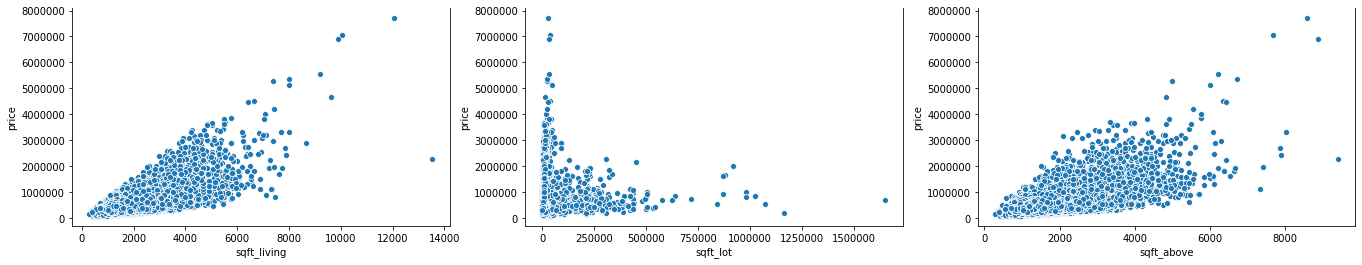

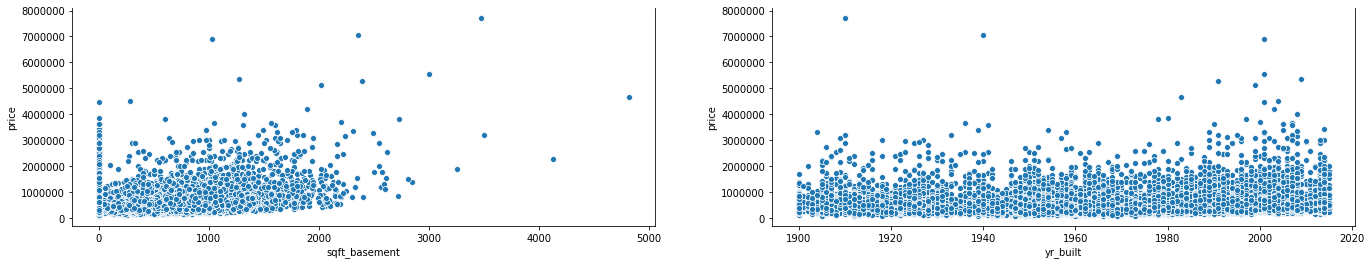

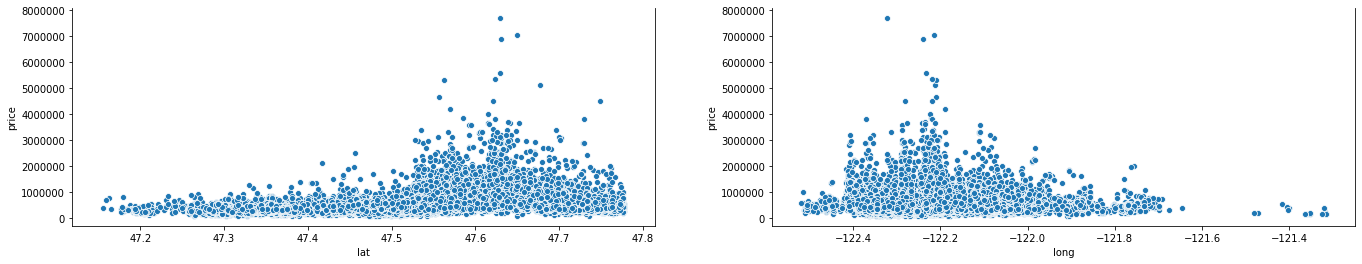

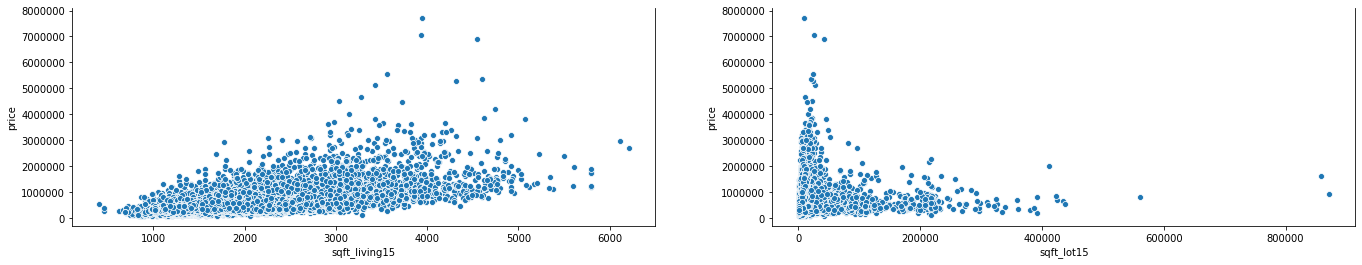

In [7]:
f, axes = plt.subplots(1,3, figsize=(23,4));
sns.scatterplot(df['sqft_living'], df['price'], ax= axes[0]);
sns.scatterplot(df['sqft_lot'], df['price'],ax= axes[1]);
sns.scatterplot(df['sqft_above'], df['price'], ax= axes[2]);
sns.despine(right = False);

f, axes = plt.subplots(1,2, figsize=(23,4));
sns.scatterplot(df['sqft_basement'], df['price'], ax= axes[0]);
sns.scatterplot(df['yr_built'], df['price'], ax= axes[1]);
sns.despine(right = False);

f, axes = plt.subplots(1,2, figsize=(23,4));
sns.scatterplot(df['lat'], df['price'], ax= axes[0]);
sns.scatterplot(df['long'], df['price'], ax= axes[1]);
sns.despine(right = False);

f, axes = plt.subplots(1,2, figsize=(23,4));
sns.scatterplot(df['sqft_living15'], df['price'], ax= axes[0]);
sns.scatterplot(df['sqft_lot15'], df['price'], ax= axes[1]);
sns.despine(right = False);

- First graph(sqft_living vs price):
    - The scatterplot shows a **positive relationship between sqft_living and price**, as sqft_living increases, the price of house increases. There's an outlier where the sqft_living is near 14000, being the highest, but but the price drops to around 2500000.


- Third graph(sqft_above vs price):
    - The scatterplot shows a **positive realationhip between sqft_above and price**, as sqft_above increases, the price of house increases. It has similar distribution as sqft_living.


- Forth graph(sqft_basement vs price):
    - The scatterplot shows a **positive relationship between sqft_basement and price**. As sqft_basement increases, the price of houses increases. 


- Eighth graph(sqft_living15 vs price):
    - The scatterplot shows a **positive relationship between sqft_living15 and price**. As sqft_living15 increases, the price of houses increases. 


- **No visual relationship** between price and sqft_lot, price and yr_built, price and lat, price and long, price and sqft_lot 15.


## Boxplot for selected features (bathrooms, bedrooms, floors, view, condition, waterfront, grade)


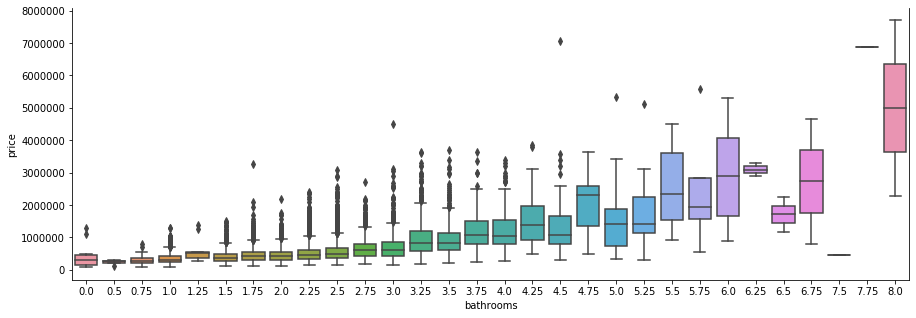

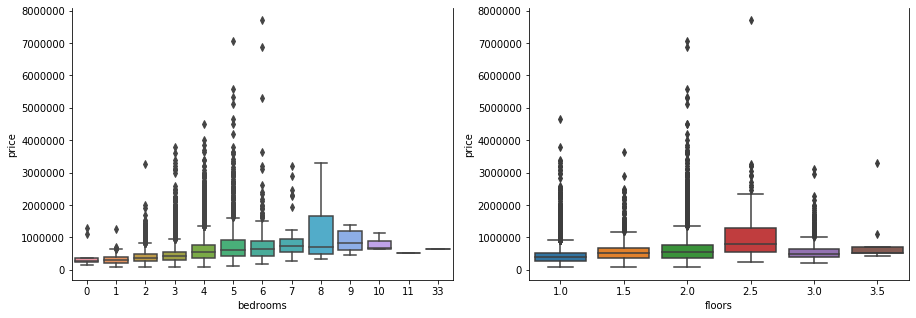

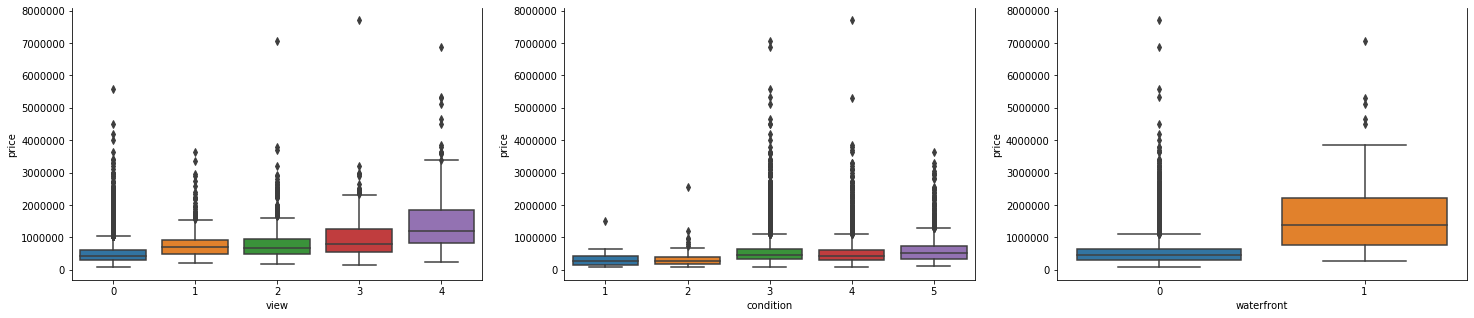

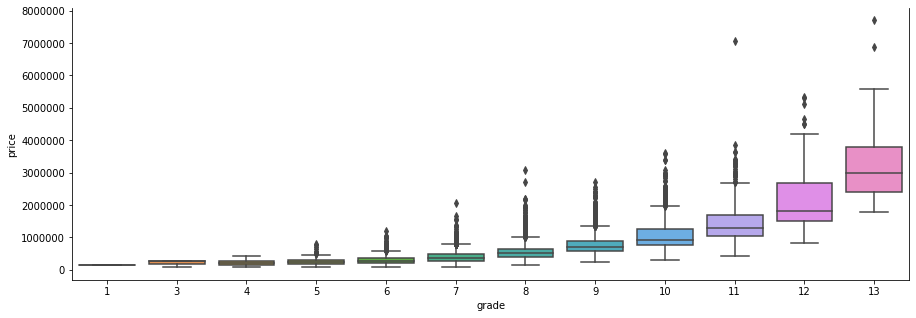

In [8]:
f, axes = plt.subplots(1,1, figsize=(15,5));
sns.boxplot(df['bathrooms'], df['price']);
sns.despine(right = False);

f, axes = plt.subplots(1,2, figsize=(15,5));
sns.boxplot(df['bedrooms'], df['price'], ax= axes[0]);
sns.boxplot(df['floors'], df['price'], ax= axes[1]);
sns.despine(right = False);

f, axes = plt.subplots(1,3, figsize=(25,5));
sns.boxplot(df['view'], df['price'], ax= axes[0]);
sns.boxplot(df['condition'], df['price'], ax= axes[1]);
sns.boxplot(df['waterfront'], df['price'], ax= axes[2]);
sns.despine(right = False);

f, axes = plt.subplots(1,1, figsize=(15,5));
sns.boxplot(df['grade'], df['price']);
sns.despine(right = False);

- First graph(bathrooms vs price):
    - From the boxplot, we can see that the highest number of bathroom in King County is 8 and lowest is 0. The prices for houses with **0 bathroom varies the most since its q2 and q3 have the greatest difference.** The prices for houses with **6.25 bathroom(6 bathrooms with toilet but no shower) varies the least since its q2 and q3 have the least difference.** In general, most type of houses has some outliers except for houses with 0 bathrooms, 4.25 bathrooms,5 bathrooms 5.5 bathrooms and more than 6 bathrooms. The boxplot also shows a general trend of positive relationship between number of bathrooms in the house and price of house.


- Second graph(bedrooms vs price):
    - From the boxplot we can see that the highest number of bedrooms of the house in King County is 33 and lowest is 0. The price for houses with **8 bedrooms varied the most since the difference between its q2 and q3 is the greatest.** The prices for houses with **10 bedrooms varied the least since the difference between its q2 and q3 is the smallest.**  Most type of the houses has some outliers except for houses with more than 7 bedrooms. The boxplot also shows a general trend of positive relationship between number of bedrooms in the house and price of house.


- Third graph(floors vs price):
    - From the boxplot we can see that the greatest number of floors of the house in King County is 3.5 and lowest is 1. The price for houses with **2.5 floors varied the most since the difference between its q2 and q3 is the greatest.** The prices for houses with **3.5 floors varied the least since the difference between its q2 and q3 is the smallest.** The boxplot also shows a general trend of positive relationship between number of floors in the house and price of house.


- Forth graph(view vs price):
    - From the boxplot we can see that the highest rating of view of the house in King County is 4 and lowest is 0. The price for houses with **view rating of 4 varied the most since the difference between its q2 and q3 is the greatest.** The prices for houses with **view rating of 1 varied the least since the difference between its q2 and q3 is the smallest.**  The boxplot also shows a general trend of positive relationship between view rating of the house and price of house.


- Fifth graph(condition vs price):
    - From the boxplot we can see that the highest rating of condition of the house in King County is 5 and lowest is 1. The price for houses with **2.5 floors varied the most since the difference between its q2 and q3 is the greatest.** The prices for houses with **3.5 floors varied the least since the difference between its q2 and q3 is the smallest.**  The boxplot also shows a general trend of positive relationship between condition rating of the house and price of house.


- Sixth graph(waterfront vs price):
    - From the boxplot we can see that the price for houses in King County which **overlook the waterfront  floors varied the most since the difference between its q2 and q3 is the greatest.** The prices for houses which **cannot overlook the waterfront varied the least since the difference between its q2 and q3 is the smallest and it has some outliers.**  The boxplot also shows a general trend of positive relationship between the ability to overlook the waterfront and price of house.


- Seventh graph(grade vs price):
    - From the boxplot we can see that the highest rating of grade of the house in King County is 13 and lowest is 1. The price for houses with **grade rating of 3 varied the most since the difference between its q2 and q3 is the greatest.** The prices for houses with **grade rating of 1 varied the least since the difference between its q2 and q3 is the smallest.** The boxplot also shows a general trend of positive relationship between the ability to overlook the waterfront and price of house.

## Histogram for price


 mu = 540088.14 and sigma = 367118.70



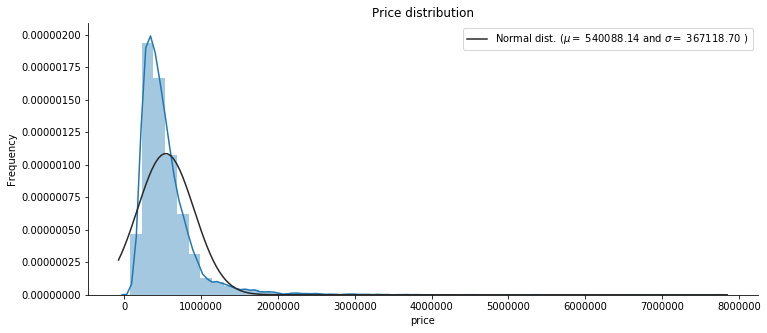

In [9]:
f, axes= plt.subplots(1,1, figsize=(12,5));
sns.distplot(df['price'] , fit=norm);
sns.despine(right = True);

# Get the fitted parameters used by the function
# mean and standard deviation
(mu, sigma) = norm.fit(df['price']);
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma));

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best');
plt.ylabel('Frequency');
plt.title('Price distribution');
plt.show()

### Normalise price in copied data

In [10]:
# normalise the price
df1 = df.copy()
df1['price']=np.log(df['price']);
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,12.309982,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,13.195614,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,12.100712,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,13.311329,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,13.142166,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



 mu = 13.05 and sigma = 0.53



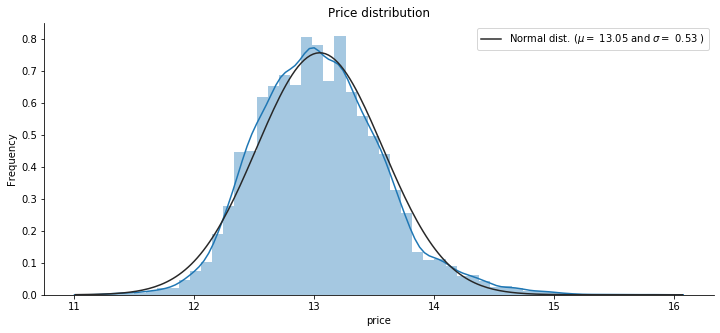

In [11]:
f, axes= plt.subplots(1,1, figsize=(12,5));
sns.distplot(df1['price'] , fit=norm);
sns.despine(right = True);

# Get the fitted parameters used by the function
# mean and standard deviation
(mu, sigma) = norm.fit(df1['price']);
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma));

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best');
plt.ylabel('Frequency');
plt.title('Price distribution');
plt.show()

- The distplot shows a normalised distribution with its central peak at around 13 and the distribution is symmetric.

## Heatmap of all features (exclude Id and Date )

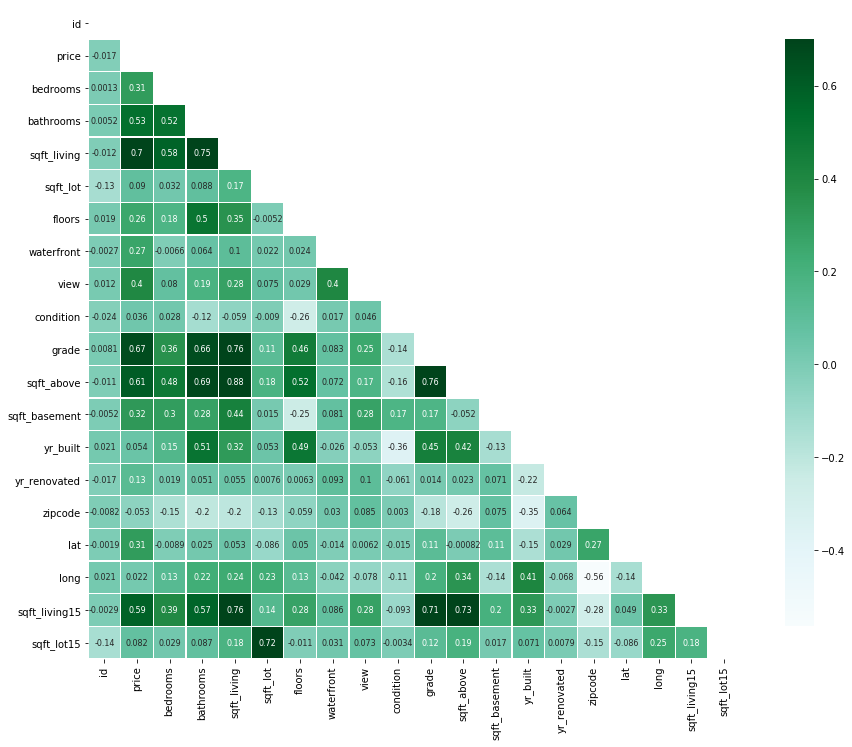

In [12]:
# heatmap of all features
mask = np.zeros_like(df.corr(), dtype=np.bool);
mask[np.triu_indices_from(mask)] = True;

f, ax = plt.subplots(figsize=(16,12));

sns.heatmap(df.corr(),linewidths=0.25, vmax=0.7, square= True, cmap='BuGn', linecolor='w',
           annot=True, annot_kws={'size': 8}, mask=mask, cbar_kws={'shrink' : 0.9});


- The heat map shows:

    - grade and sqft_living both shows a relative high relationship of 0.7 with price.
    - sqft_living has a relative high relationship of 0.75 with bathrooms.
    - sqft_above, grade and sqft_living15 have a relative high relationship of 0.88, 0.76 and 0.76 with sqft_living respectively.
    - sqft_above shows a relative high relationship of 0.76 with grade.


# Data Preparation

## Drop features (id and date)

In [13]:
# Drop id and date
df1.drop(['id','date'],axis=1,inplace=True);
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,12.899220,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,12.904459,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,12.899220,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Remove the row of extreme value (33) in bedrooms

In [14]:
df1.drop(df1[df1['bedrooms'] == 33].index, inplace = True) 
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,12.899220,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,12.904459,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,12.899220,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Drop feature (sqft_above and sqft_basement)

In [15]:
df1.drop(columns=['sqft_above','sqft_basement'], inplace= True);
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650
1,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639
2,12.100712,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062
3,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000
4,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503


## Normalise sqft columns

In [16]:
df1['sqft_living'] = np.log(df1['sqft_living'])
df1['sqft_lot'] = np.log(df1['sqft_lot'])
df1['sqft_living15'] = np.log(df1['sqft_living15'])
df1['sqft_lot15'] = np.log(df1['sqft_lot15'])

In [17]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,3,1.00,7.073270,8.639411,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,7.200425,8.639411
1,13.195614,3,2.25,7.851661,8.887653,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,7.432484,8.941022
2,12.100712,2,1.00,6.646391,9.210340,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,7.908387,8.994917
3,13.311329,4,3.00,7.580700,8.517193,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,7.215240,8.517193
4,13.142166,3,2.00,7.426549,8.997147,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,7.495542,8.923058


# Separate the data into Train and Test sets

In [19]:
from sklearn.model_selection import train_test_split
X = df1.drop(['price'], axis=1)
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print("Train : {},{}".format(X_train.shape,y_train.shape));
print("Test : {},{}".format(X_test.shape,y_test.shape));

Train : (17289, 16),(17289,)
Test : (4323, 16),(4323,)


In [20]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Train Model with Algorithm:

### Import Models

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV

## Train and test score for all algorithms

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict1 = lr.predict(X_test)
lr_train = lr.score(X_train, y_train)
lr_test = r2_score(y_test, y_predict1)
print('Train Score for LinearRegression : {}'.format(lr_train));
print('Test Score for LinearRegression : {}\n'.format(lr_test));


dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_predict2 = dt.predict(X_test)
dt_train = dt.score(X_train, y_train) 
dt_test = r2_score(y_test, y_predict2)
print('Train Score for DecisionTreeRegressor : {}'.format(dt_train));
print('Test Score for DecisionTreeRegressor : {}\n'.format(dt_test));

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_predict3 = rf.predict(X_test)
rf_train = rf.score(X_train, y_train)
rf_test = r2_score(y_test, y_predict3)
print('Train Score for RandomForestRegressor : {}'.format(rf_train));
print('Test Score for RandomForestRegressor : {}\n'.format(rf_test));

mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_predict4 = mlp.predict(X_test)
mlp_train = mlp.score(X_train, y_train)
mlp_test = r2_score(y_test, y_predict4)
print('Train Score for MLPRegressor : {}'.format(mlp_train));
print('Test Score for MLPRegressor : {}\n'.format(mlp_test));

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_predict5 = gbr.predict(X_test)
gbr_train = gbr.score(X_train, y_train) 
gbr_test = r2_score(y_test, y_predict5)
print('Train Score for GradientBoostingRegressor : {}'.format(gbr_train));
print('Test Score for GradientBoostingRegressor : {}\n'.format(gbr_test));

Train Score for LinearRegression : 0.7692225858483414
Test Score for LinearRegression : 0.7855040239206811

Train Score for DecisionTreeRegressor : 0.9968356294540869
Test Score for DecisionTreeRegressor : 0.788046590979143

Train Score for RandomForestRegressor : 0.98200854113581
Test Score for RandomForestRegressor : 0.8932705576196455

Train Score for MLPRegressor : -208.03757977328064
Test Score for MLPRegressor : -200.6578931485282

Train Score for GradientBoostingRegressor : 0.8856510558817976
Test Score for GradientBoostingRegressor : 0.8817899786883902



## Choose algorithm and tune the hyperparameters

### Linear Regression


In [23]:
#  Linear Regression
param_grid= {
    'fit_intercept': [True, False],
    'normalize' : [True, False],
    'copy_X' :[True, False]
}
lr_gs = GridSearchCV(estimator= LinearRegression(), param_grid=param_grid,cv=10,verbose = 1, scoring="r2",n_jobs= 6);
lr_gs.fit(X_train,y_train);
print("Linear Regression best score: ",lr_gs.best_score_);
print("Linear Regression best params: ", lr_gs.best_params_);

#  Defining the logistic regression
lr_best = LinearRegression( copy_X=lr_gs.best_params_.get('copy_X'), fit_intercept=lr_gs.best_params_.get('fit_intercept'),
                            normalize=lr_gs.best_params_.get('normalize'))
lr_best.fit(X_train,y_train)
y_pred1 = lr_best.predict(X_test)

n= len(X_train)
k = X_train.shape[1]

r2_train = lr_best.score(X_train,y_train)
r2_test = r2_score(y_test, y_pred1).round(3)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred1)) , '.3f'))
MSE = mean_squared_error(y_test, y_pred1).round(3)
MAE = mean_absolute_error(y_test, y_pred1).round(3)
adj_r2 = 1-(1-r2_test)*(n-1)/(n-k-1)
MAPE = (np.mean( np.abs((y_test - y_pred1) /y_test ) ) * 100)

print('\nr2_score_train:', r2_train, '\nr2_score_test:', r2_test, '\nRMSE =',RMSE, 
      '\nMSE =',MSE, '\nMAE =',MAE,'\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =',MAPE, '%', '\n')

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.4s


Linear Regression best score:  0.76856560501724
Linear Regression best params:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}

r2_score_train: 0.7692194467665296 
r2_score_test: 0.785 
RMSE = 0.247 
MSE = 0.061 
MAE = 0.19 
Adjusted R2 = 0.7848008337193145 
Mean Absolute Percentage Error = 1.4550535710939272 % 



[Parallel(n_jobs=6)]: Done  69 out of  80 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:    2.8s finished


### Random Forest Regression


In [24]:
#  Random Forest Regression
param_grid= {
    'n_estimators': [100,200],
    'criterion' : ['mse','mae'],
    'max_depth' :[None],
    'min_samples_split' : [2,4],
    'min_samples_leaf' : [5,7],
    'max_features': ['sqrt', 'log2']
}
rf_gs = GridSearchCV(estimator= RandomForestRegressor(), param_grid=param_grid,cv=4,verbose = 1, scoring="r2",n_jobs= 6);
rf_gs.fit(X_train,y_train);
print("Random Forest Regression best score: ",rf_gs.best_score_);
print("Random Forest Regression best params: ", rf_gs.best_params_);

#  Defining the logistic regression
rf_best = RandomForestRegressor(n_estimators=rf_gs.best_params_.get('n_estimators'),
                                criterion=rf_gs.best_params_.get('criterion'),
                                max_depth=rf_gs.best_params_.get('max_depth'),
                                min_samples_split=rf_gs.best_params_.get('min_samples_split'),
                                min_samples_leaf=rf_gs.best_params_.get('min_samples_leaf'),
                                max_features=rf_gs.best_params_.get('max_features'),
                               )
rf_best.fit(X_train,y_train)
y_pred2 = rf_best.predict(X_test)

n= len(X_train)
k = X_train.shape[1]

r2_train = rf_best.score(X_train,y_train)
r2_test = r2_score(y_test, y_pred2).round(3)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred2)) , '.3f'))
MSE = mean_squared_error(y_test, y_pred2).round(3)
MAE = mean_absolute_error(y_test, y_pred2).round(3)
adj_r2 = 1-(1-r2_test)*(n-1)/(n-k-1)
MAPE = (np.mean( np.abs((y_test - y_pred2) /y_test ) ) * 100)

print('\nr2_score_train:', r2_train, '\nr2_score_test:', r2_test, '\nRMSE =',RMSE, 
      '\nMSE =',MSE, '\nMAE =',MAE,'\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =',MAPE, '%', '\n')

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   23.3s
[Parallel(n_jobs=6)]: Done 128 out of 128 | elapsed: 26.6min finished


Random Forest Regression best score:  0.8795712840775232
Random Forest Regression best params:  {'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}

r2_score_train: 0.9341889153494027 
r2_score_test: 0.887 
RMSE = 0.179 
MSE = 0.032 
MAE = 0.127 
Adjusted R2 = 0.8868953219082909 
Mean Absolute Percentage Error = 0.9721201195948709 % 



### Gradient Boosting Regressor

In [25]:
#  Gradient Boosting Regressor
param_grid= {
    'loss': ['huber'],
    'n_estimators' : [2000,3000],
    'learning_rate' :[0.1],
    'max_depth' : [2,4],
    'max_features': ['sqrt'],
    'min_samples_split' : [10,20],
    'min_samples_leaf' : [10,15]
}

gbr_gs = GridSearchCV(estimator= GradientBoostingRegressor(), param_grid=param_grid,cv=4,verbose = 1, scoring="r2",n_jobs= 6);
gbr_gs.fit(X_train,y_train);
print("GradientBoosting Regression best score: ",gbr_gs.best_score_);
print("GradientBoosting Regression best params: ", gbr_gs.best_params_);

#  Defining the GradientBoosting Regressor
gbr_best = GradientBoostingRegressor(learning_rate=gbr_gs.best_params_.get('learning_rate'),
                                     loss=gbr_gs.best_params_.get('loss'),
                                     max_depth=gbr_gs.best_params_.get('max_depth'),
                                     max_features=gbr_gs.best_params_.get('max_features'),
                                     min_samples_leaf=gbr_gs.best_params_.get('min_samples_leaf'),
                                     min_samples_split=gbr_gs.best_params_.get('min_samples_split'),
                                     n_estimators=gbr_gs.best_params_.get('n_estimators')
                                    )
gbr_best.fit(X_train,y_train)
y_pred3 = gbr_best.predict(X_test)

n= len(X_train)
k = X_train.shape[1]

r2_train = gbr_best.score(X_train,y_train)
r2_test = r2_score(y_test, y_pred3).round(3)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred3)) , '.3f'))
MSE = mean_squared_error(y_test, y_pred3).round(3)
MAE = mean_absolute_error(y_test, y_pred3).round(3)
adj_r2 = 1-(1-r2_test)*(n-1)/(n-k-1)
MAPE = (np.mean( np.abs((y_test - y_pred3) /y_test ) ) * 100)

print('\nr2_score_train:', r2_train, '\nr2_score_test:', r2_test, '\nRMSE =',RMSE, 
      '\nMSE =',MSE, '\nMAE =',MAE,'\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =',MAPE, '%', '\n')

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done  64 out of  64 | elapsed:  5.2min finished


GradientBoosting Regression best score:  0.9007977529039308
GradientBoosting Regression best params:  {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 2000}

r2_score_train: 0.949779005886666 
r2_score_test: 0.911 
RMSE = 0.159 
MSE = 0.025 
MAE = 0.113 
Adjusted R2 = 0.9109175544233442 
Mean Absolute Percentage Error = 0.8675714296944732 % 



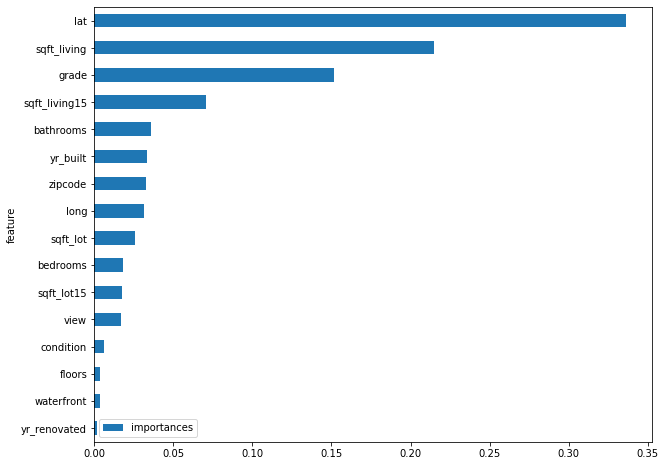

In [26]:
features_in_df = df1.drop(["price"], axis=1);
features = pd.DataFrame();
features['feature'] = features_in_df.columns;
features['importances'] = gbr_best.feature_importances_;
features.sort_values(by=['importances'], ascending=True,  inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(10, 8),);
plt.show();

# Conclusion

1. How is your prediction task defined? And what is the meaning of the output variable?
    - Prediction task is the price of houses. The output variable is the predicted price of the houses in King Country.


2. How do you represent your data as features?
    - Drop the columns that are not important to the contribution of result and keep the rest. 
    
    
3. Did you process the features in any way?
    - Since all columns don't have null values, no specified changes to them.
    - Drop id, date, sqft_above and sqft_basement
    - Normalise the Price column


4. Did you bring in any additional sources of data?
    - references on the different models and algorithms.


5. How did you select which learning algorithms to use?
    - Since we are using regression for this problem, i choose the algorithms that are used to predict numeric, which includes :
        - LinearRegression
        - DecisionTreeRegressor
        - RandomForestRegressor
        - MLPRegressor
        - GradientBoostingRegressor


6. Did you try to tune the hyperparameters of the learning algorithm, and in that case how?
    - By using GridSearchCV from model_selection of sklearn and setting up the hyperparameters, it can find the most suitable hyperparameters, giving the best R2 score.
    
    
7. How do you evaluate the quality of your system?
    - By using the r2_score, mean_absolute_error, mean_squared_error from sklearn.metrics to find the scores of the trained model and that on test set. 
    
    
8. How well does your system compare to a stupid baseline?
    - It reduces the possibility of overfitting and underfitting, and my GradientBoosting Regressor gives a high R2 test score of 0.90.


9. Can you say anything about the errors that the system makes?
    - The errors could be caused by overfitting or underfitting, but they are unavoidable, since we use train_test_split function to split our Train data into train set and test set. There are some variability of how the data is splitted.


10. Is it possible to say something about which features the model considers important?
    - The features which have high correlation with the price feature are considered important, if we drop those features, the score will be affected too.
    -By using GradientBoosting Regressor model and the feature_importances_ function, i can get the results for importance of all features. Looking at the graph, lat is the most important feature, followed by grade and sqft_living. They all have importance more than 0.15.

# References

- Kaggle.com. 2020. King County House Prediction R2score .90. [online] Available at: <https://www.kaggle.com/temitopewalker/king-county-house-prediction-r2score-90> [Accessed 10 August 2020].


- Kaggle.com. 2017. King County House Prediction R2score .90. [online] Available at: <https://www.kaggle.com/temitopewalker/king-county-house-prediction-r2score-90> [Accessed 10 August 2020].